In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('energy_results.csv')

In [4]:
df.head()

,slab_index,element_combo,adsorbate,position,energy,traj_file,input_file,output_file
0,2,C-o-2-3-N-i-2-6-P-d-1-9-R-h-2-6-R-u-1-4,CH4,"(6, 6)",-0.214404,outputs/Co23Ni26Pd19Rh26Ru14-FCC/slab_2_CH4_6_...,data/input/input_slab_2_CH4_6_6.vasp,data/output/relaxed_slab_2_CH4_6_6.vasp
1,2,C-o-2-3-N-i-2-6-P-d-1-9-R-h-2-6-R-u-1-4,CH4,"(6, 7)",-0.263584,outputs/Co23Ni26Pd19Rh26Ru14-FCC/slab_2_CH4_6_...,data/input/input_slab_2_CH4_6_7.vasp,data/output/relaxed_slab_2_CH4_6_7.vasp
2,2,C-o-2-3-N-i-2-6-P-d-1-9-R-h-2-6-R-u-1-4,CH4,"(5, 7)",0.160304,outputs/Co23Ni26Pd19Rh26Ru14-FCC/slab_2_CH4_5_...,data/input/input_slab_2_CH4_5_7.vasp,data/output/relaxed_slab_2_CH4_5_7.vasp
3,2,C-o-2-3-N-i-2-6-P-d-1-9-R-h-2-6-R-u-1-4,CH4,"(7, 5)",0.009070,outputs/Co23Ni26Pd19Rh26Ru14-FCC/slab_2_CH4_7_...,data/input/input_slab_2_CH4_7_5.vasp,data/output/relaxed_slab_2_CH4_7_5.vasp
4,2,C-o-2-3-N-i-2-6-P-d-1-9-R-h-2-6-R-u-1-4,CH4,"(5, 6)",-0.115354,outputs/Co23Ni26Pd19Rh26Ru14-FCC/slab_2_CH4_5_...,data/input/input_slab_2_CH4_5_6.vasp,data/output/relaxed_slab_2_CH4_5_6.vasp


In [5]:
df['adsorbate'].unique()


array(['CH4', 'CH3', 'CO', 'CO2', 'CH', 'C', 'HCO', 'CH3O', 'H', 'H2',
       'H2O', 'OH', 'CH2', 'O', 'HCOO', 'COOH', 'CH2O'], dtype=object)

                mean       min        max       std  count
adsorbate                                                 
C           5.265722  1.593580  15.563923  1.369650  16000
CH          5.644689  0.981360  19.531477  2.541436  16000
CH2         4.214832  0.246561  21.514791  3.135104  16000
CH2O        3.168659  0.143856   7.298456  0.915438  16000
CH3         2.851522  0.427729   6.083298  0.679282  16000
CH3O        2.433545 -0.446518   6.887982  0.886547  16000
CH4        -0.027970 -2.183001   2.127981  0.678177  16000
CO          4.270724  0.927340  28.293585  2.201621  16000
CO2         5.299018  0.707766  41.628922  4.163486  16000
COOH        5.441533  0.553130  42.696159  4.071454  16000
H           4.963512 -0.228199  10.209717  0.839621  16000
H2          4.668006  0.866740   9.243198  1.066664  16000
H2O         3.713092  0.622387   6.398720  0.627503  16000
HCO         3.673396  0.531241   7.790254  0.908513  16000
HCOO       16.701420  0.910795  45.810883  7.017641  160

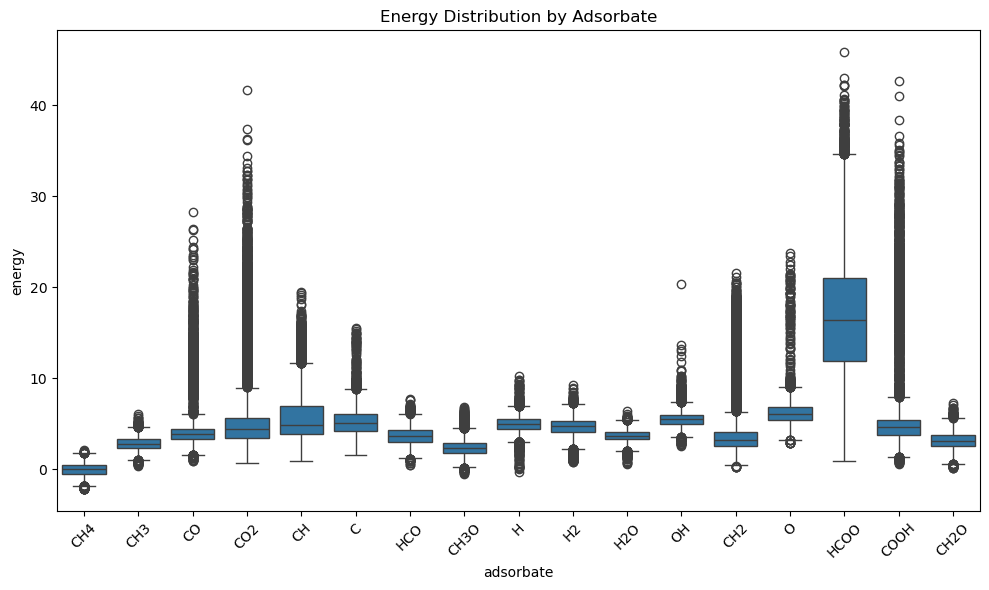

In [6]:
# Convert 'energy' to float (if not already)
df['energy'] = df['energy'].astype(float)

# Basic statistics: mean, min, max energy per adsorbate
stats = df.groupby('adsorbate')['energy'].agg(['mean', 'min', 'max', 'std', 'count'])
print(stats)

# Find the lowest energy configuration for each adsorbate
min_energy = df.loc[df.groupby('adsorbate')['energy'].idxmin()]
print(min_energy[['adsorbate', 'energy', 'position', 'element_combo']])

# Plot energy distributions for each adsorbate
plt.figure(figsize=(10, 6))
sns.boxplot(x='adsorbate', y='energy', data=df)
plt.title('Energy Distribution by Adsorbate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


NameError: name 'ast' is not defined

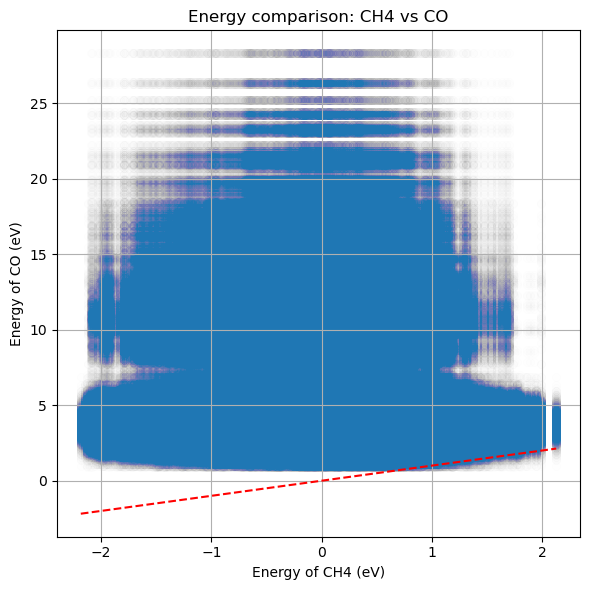

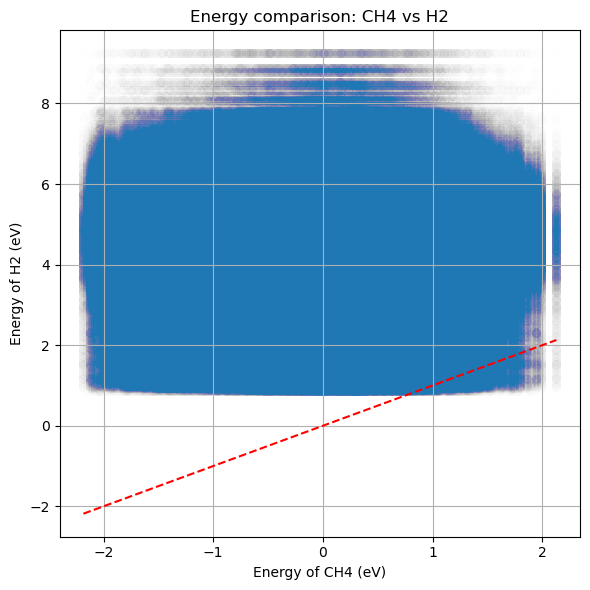

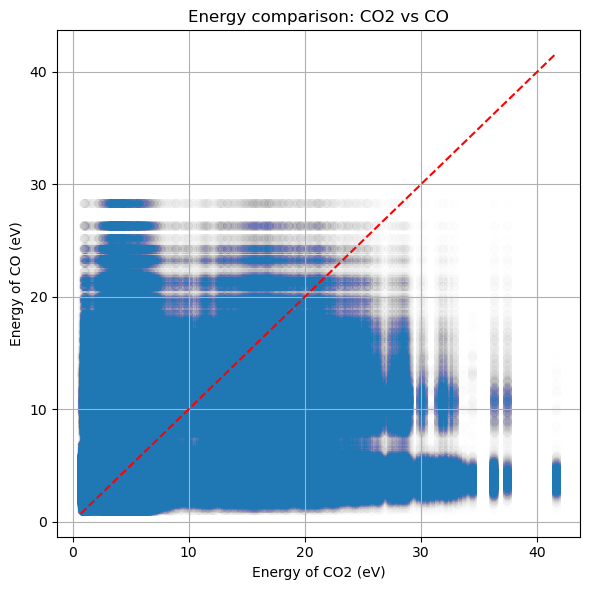

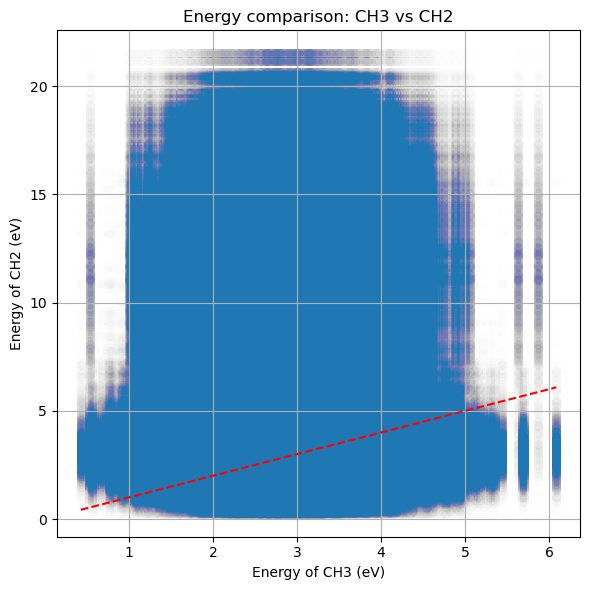

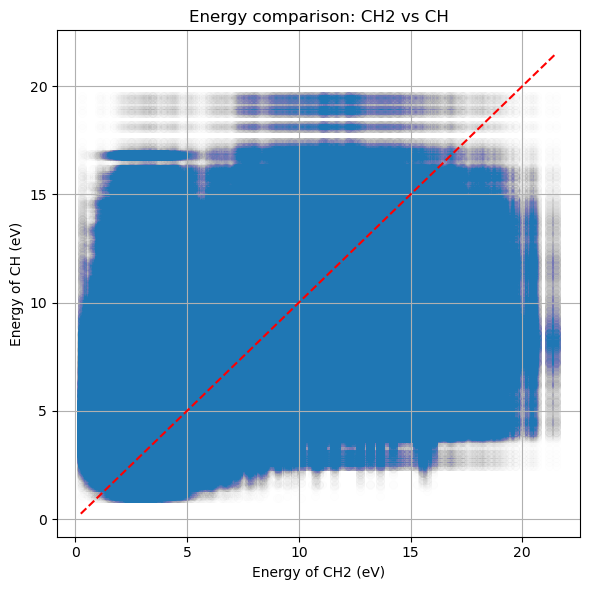

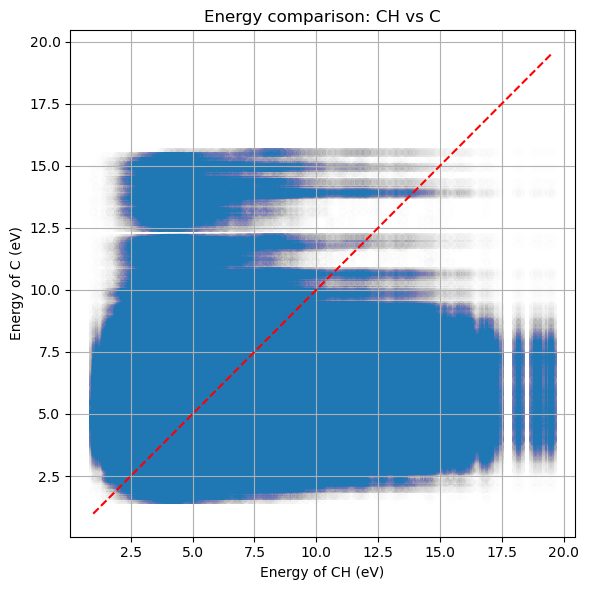

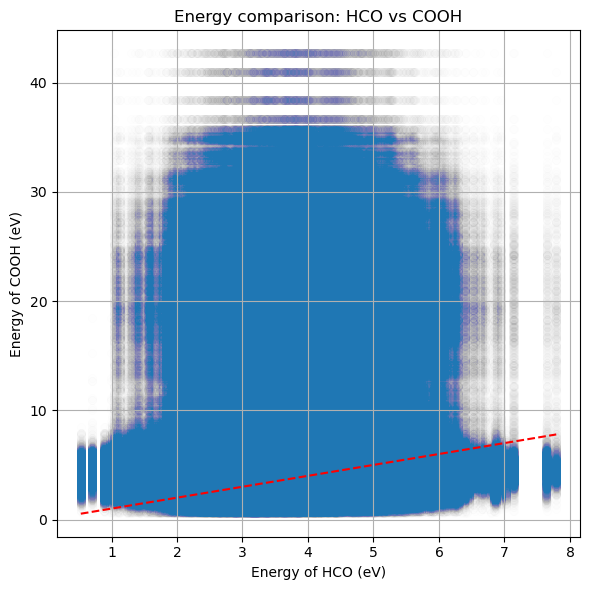

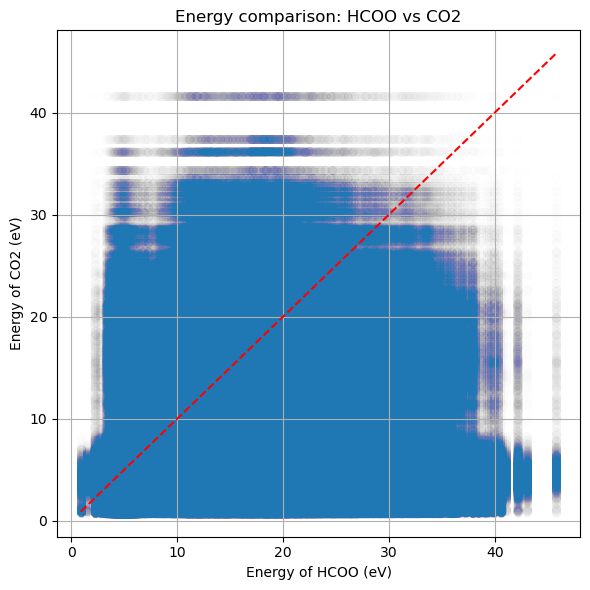

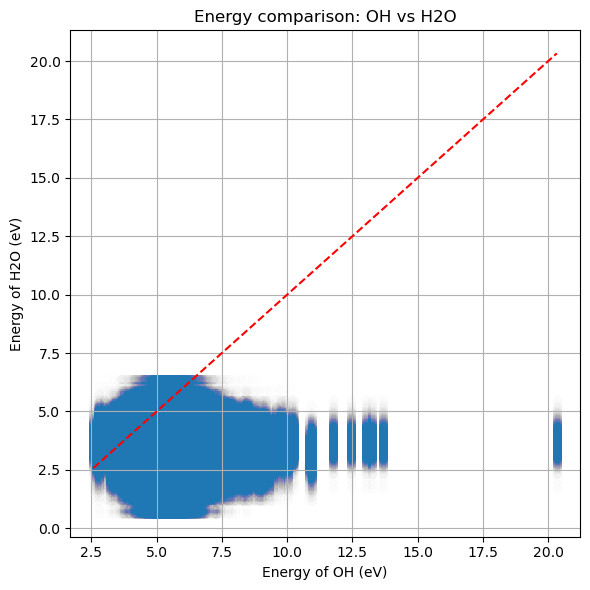

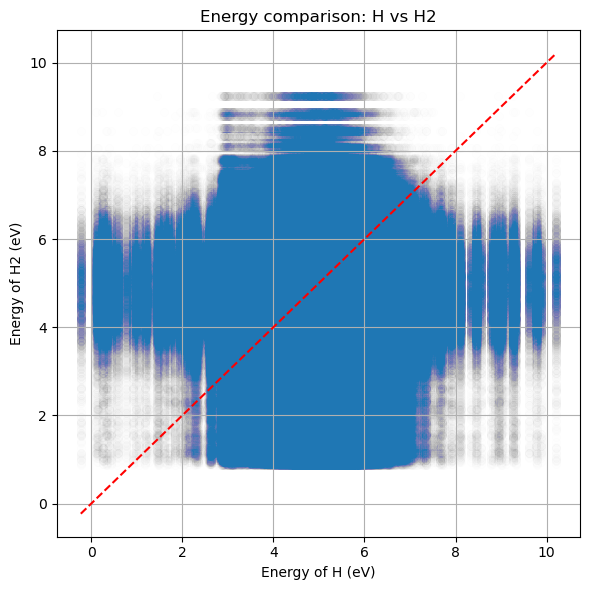

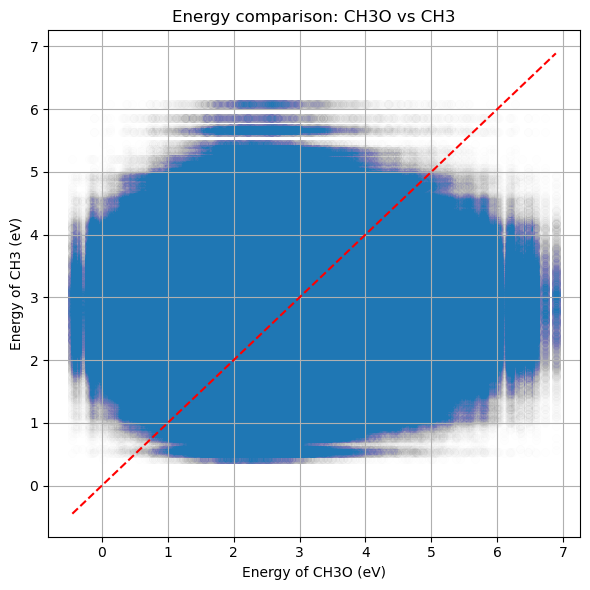

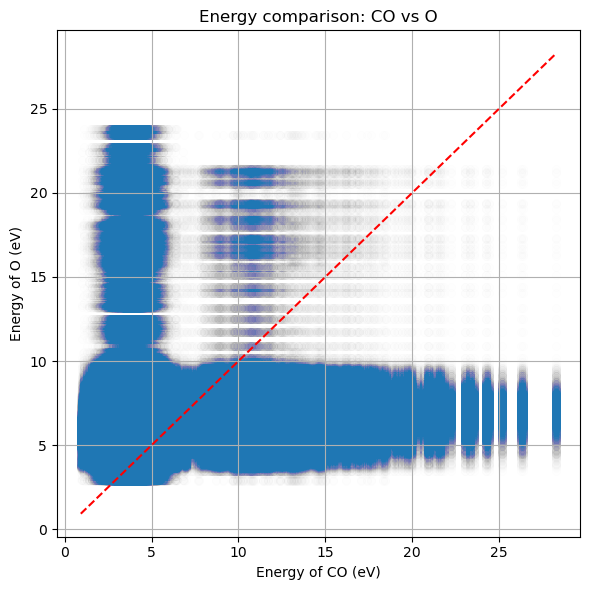

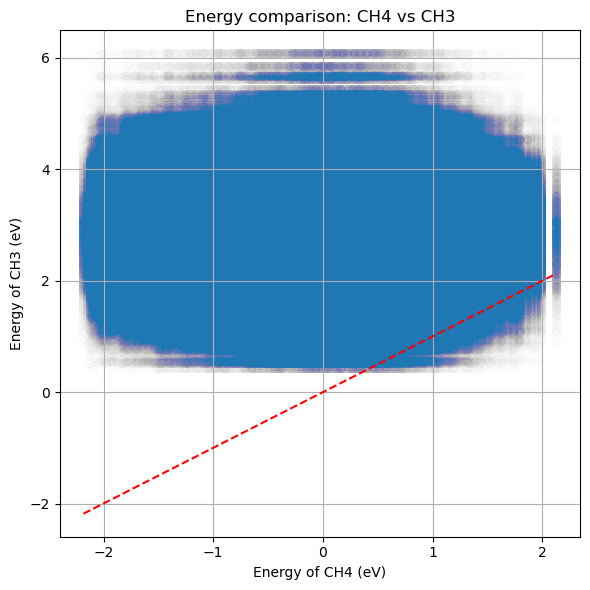

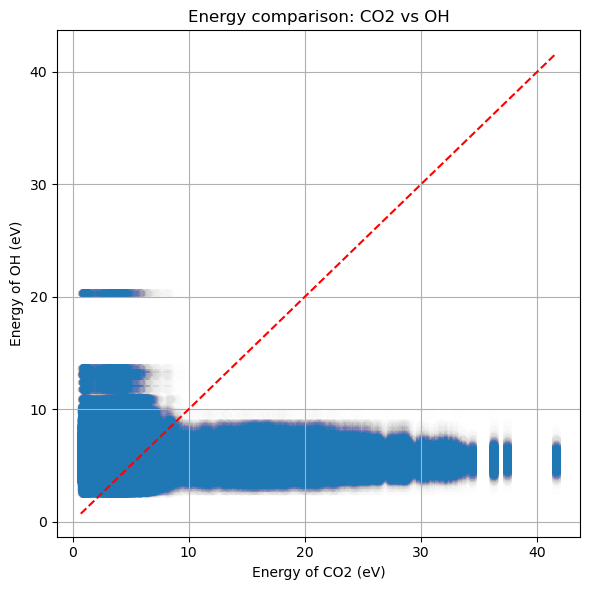


KeyboardInterrupt



In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
df['position'] = df['position'].apply(ast.literal_eval)
# Example: Load your data (adjust path or data loading as needed)
# df = pd.read_csv('your_data_file.csv', sep='\t')

# Convert 'position' string tuples to actual tuples for plotting if needed


# Select pairs of adsorbates to compare, e.g., CH4 vs CO, CH4 vs H2, CO2 vs CO
pairs = [
    ('CH4', 'CO'), ('CH4', 'H2'), ('CO2', 'CO'),
    ('CH3', 'CH2'), ('CH2', 'CH'), ('CH', 'C'),
    ('HCO', 'COOH'), ('HCOO', 'CO2'), ('OH', 'H2O'),
    ('H', 'H2'), ('CH3O', 'CH3'), ('CO', 'O'),
    ('CH4', 'CH3'), ('CO2', 'OH'), ('CH2O', 'HCO')
]

for ads1, ads2 in pairs:
    # Filter data for each adsorbate
    df1 = df[df['adsorbate'] == ads1]
    df2 = df[df['adsorbate'] == ads2]

    # Merge on position to compare energies at the same sites if applicable
    merged = pd.merge(df1, df2, on='position', suffixes=(f'_{ads1}', f'_{ads2}'))

    if merged.empty:
        print(f"No matching positions found for pair {ads1} and {ads2}")
        continue

    plt.figure(figsize=(6, 6))
    plt.scatter(merged[f'energy_{ads1}'], merged[f'energy_{ads2}'], alpha=0.005)
    plt.xlabel(f'Energy of {ads1} (eV)')
    plt.ylabel(f'Energy of {ads2} (eV)')
    plt.title(f'Energy comparison: {ads1} vs {ads2}')
    plt.grid(True)
    plt.plot([merged[f'energy_{ads1}'].min(), merged[f'energy_{ads1}'].max()],
             [merged[f'energy_{ads1}'].min(), merged[f'energy_{ads1}'].max()], 'r--')  # y=x line
    plt.tight_layout()
    plt.show()


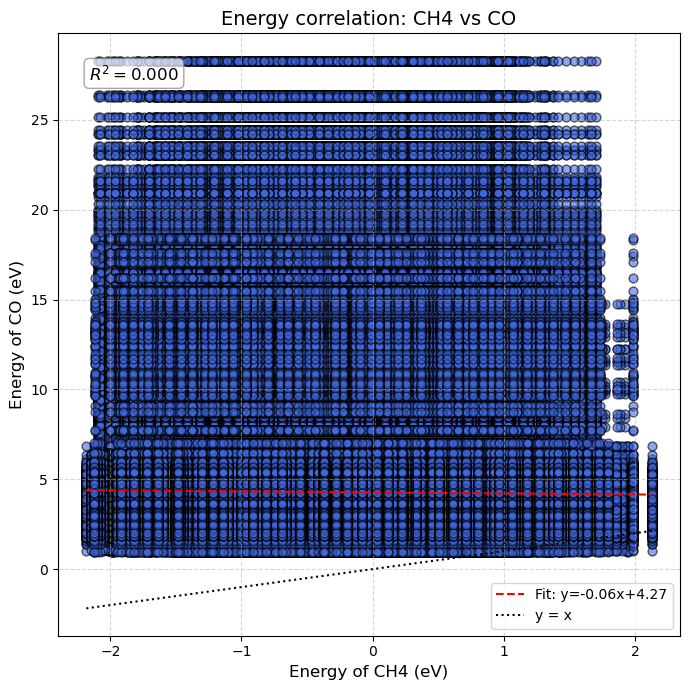

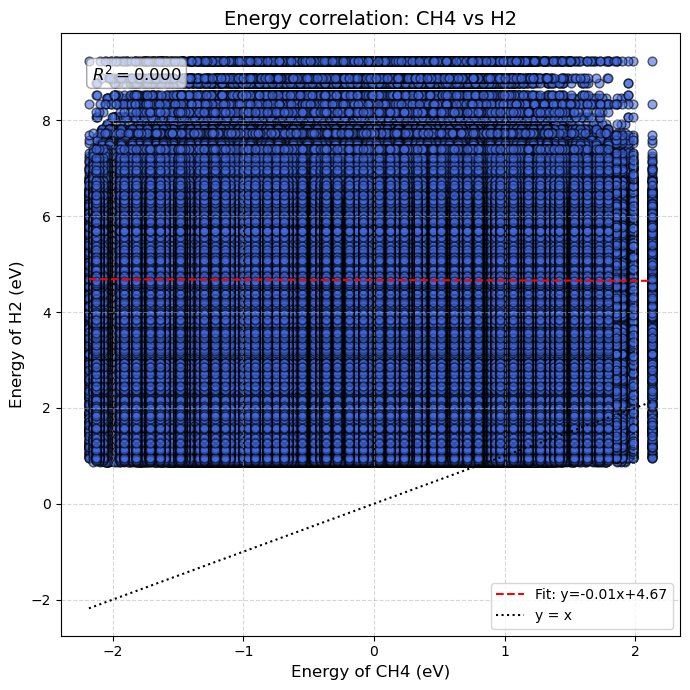

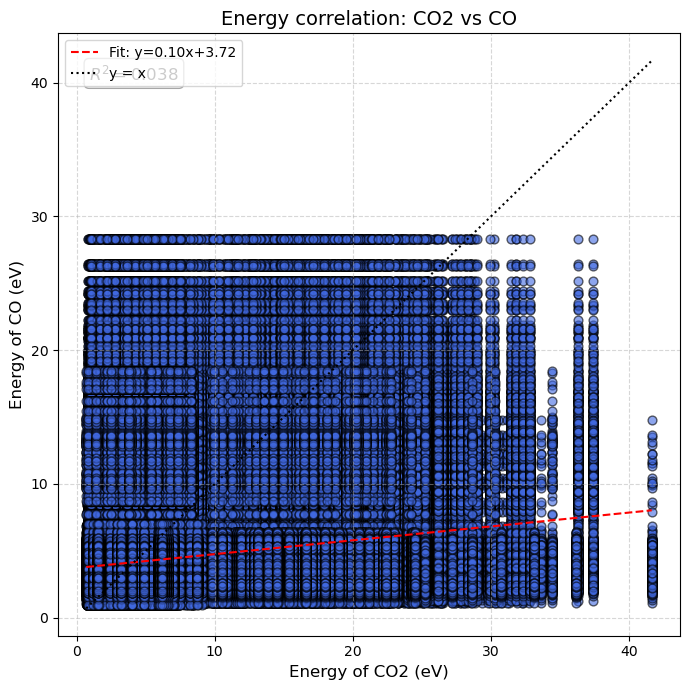

KeyboardInterrupt: 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from scipy.stats import linregress

# Convert 'position' strings to tuples if not done yet

pairs = [
    ('CH4', 'CO'), ('CH4', 'H2'), ('CO2', 'CO'),
    ('CH3', 'CH2'), ('CH2', 'CH'), ('CH', 'C'),
    ('HCO', 'COOH'), ('HCOO', 'CO2'), ('OH', 'H2O'),
    ('H', 'H2'), ('CH3O', 'CH3'), ('CO', 'O'),
    ('CH4', 'CH3'), ('CO2', 'OH'), ('CH2O', 'HCO')
]

for ads1, ads2 in pairs:
    df1 = df[df['adsorbate'] == ads1]
    df2 = df[df['adsorbate'] == ads2]

    merged = pd.merge(df1, df2, on='position', suffixes=(f'_{ads1}', f'_{ads2}'))

    if merged.empty:
        print(f"No matching positions found for pair {ads1} and {ads2}")
        continue

    x = merged[f'energy_{ads1}']
    y = merged[f'energy_{ads2}']

    # Linear regression for R^2 and line fit
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    line_x = [x.min(), x.max()]
    line_y = [slope * xi + intercept for xi in line_x]

    plt.figure(figsize=(7, 7))
    plt.scatter(x, y, alpha=0.6, edgecolor='k', s=40, c='royalblue')
    plt.plot(line_x, line_y, 'r--', label=f'Fit: y={slope:.2f}x+{intercept:.2f}')
    plt.plot(line_x, line_x, 'k:', label='y = x')

    plt.xlabel(f'Energy of {ads1} (eV)', fontsize=12)
    plt.ylabel(f'Energy of {ads2} (eV)', fontsize=12)
    plt.title(f'Energy correlation: {ads1} vs {ads2}', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(loc='best')
    plt.text(0.05, 0.95, f'$R^2 = {r_value**2:.3f}$', transform=plt.gca().transAxes,
             fontsize=12, verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.7))

    plt.tight_layout()
    plt.show()


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# ... (data loading and filtering remains unchanged) ...

# Continuous scoring function based on adsorption energy profiles
def continuous_score(adsorbate, energy):
    if adsorbate == 'CH4':
        # Linear increase for weak adsorption (ideal: > -0.3eV)
        return max(0, 2 * (energy + 0.3))  # [1]
    
    elif adsorbate == 'CO2':
        # Triangular function for moderate adsorption (peak: -0.6eV)
        if energy < -0.8 or energy > -0.4: 
            return 0
        return 1.5 * min(energy + 0.8, -energy - 0.4) / 0.2  # [1]
    
    elif adsorbate == 'C':
        # Linear increase to avoid coking (ideal: > -1.0eV)
        return max(0, 2 * (energy + 1.0))  # [1]
    
    elif adsorbate == 'CO':
        # Linear increase to prevent poisoning (ideal: > -0.7eV)
        return max(0, 1.5 * (energy + 0.7))  # [1]
    
    elif adsorbate == 'O':
        # Triangular function for oxidation (-1.15eV peak)
        if energy < -1.5 or energy > -0.8: 
            return 0
        return min(energy + 1.5, -energy - 0.8) / 0.35  # [1]
    
    elif adsorbate == 'CH3':
        # Linear increase for weak adsorption
        return max(0, 0.5 * (energy + 0.5))  # [1]
    
    elif adsorbate == 'OH':
        # Triangular function for hydroxyl groups
        if energy < -1.0 or energy > -0.3: 
            return 0
        return 0.5 * min(energy + 1.0, -energy - 0.3) / 0.35  # [1]
    
    return 0

# Apply continuous scoring
best_configs['score'] = best_configs.apply(
    lambda row: continuous_score(row['adsorbate'], row['energy']), 
    axis=1
)

# ... (aggregation and plotting remains unchanged) ...


In [11]:
best_configs

,slab_index,element_combo,adsorbate,position,energy,traj_file,input_file,output_file,score
32272,239,C-o-1-0-N-i-2-1-P-d-2-1-R-h-2-5-R-u-3-1,C,"(6, 6)",2.893200,outputs/Co10Ni21Pd21Rh25Ru31-FCC/slab_239_C_6_...,data/input/input_slab_239_C_6_6.vasp,data/output/relaxed_slab_239_C_6_6.vasp,7.786400
32243,239,C-o-1-0-N-i-2-1-P-d-2-1-R-h-2-5-R-u-3-1,CH3,"(7, 5)",1.884035,outputs/Co10Ni21Pd21Rh25Ru31-FCC/slab_239_CH3_...,data/input/input_slab_239_CH3_7_5.vasp,data/output/relaxed_slab_239_CH3_7_5.vasp,1.192018
32239,239,C-o-1-0-N-i-2-1-P-d-2-1-R-h-2-5-R-u-3-1,CH4,"(7, 7)",-1.324796,outputs/Co10Ni21Pd21Rh25Ru31-FCC/slab_239_CH4_...,data/input/input_slab_239_CH4_7_7.vasp,data/output/relaxed_slab_239_CH4_7_7.vasp,0.000000
32248,239,C-o-1-0-N-i-2-1-P-d-2-1-R-h-2-5-R-u-3-1,CO,"(6, 6)",2.767789,outputs/Co10Ni21Pd21Rh25Ru31-FCC/slab_239_CO_6...,data/input/input_slab_239_CO_6_6.vasp,data/output/relaxed_slab_239_CO_6_6.vasp,5.201683
32260,239,C-o-1-0-N-i-2-1-P-d-2-1-R-h-2-5-R-u-3-1,CO2,"(5, 6)",2.294483,outputs/Co10Ni21Pd21Rh25Ru31-FCC/slab_239_CO2_...,data/input/input_slab_239_CO2_5_6.vasp,data/output/relaxed_slab_239_CO2_5_6.vasp,0.000000
...,...,...,...,...,...,...,...,...,...
41484,307,C-o-3-7-N-i-2-0-P-d-2-2-R-h-1-1-R-u-1-8,CH4,"(5, 6)",-0.541625,outputs/Co37Ni20Pd22Rh11Ru18-FCC/slab_307_CH4_...,data/input/input_slab_307_CH4_5_6.vasp,data/output/relaxed_slab_307_CH4_5_6.vasp,0.000000
41497,307,C-o-3-7-N-i-2-0-P-d-2-2-R-h-1-1-R-u-1-8,CO,"(6, 7)",4.262397,outputs/Co37Ni20Pd22Rh11Ru18-FCC/slab_307_CO_6...,data/input/input_slab_307_CO_6_7.vasp,data/output/relaxed_slab_307_CO_6_7.vasp,7.443596
41505,307,C-o-3-7-N-i-2-0-P-d-2-2-R-h-1-1-R-u-1-8,CO2,"(6, 7)",1.025105,outputs/Co37Ni20Pd22Rh11Ru18-FCC/slab_307_CO2_...,data/input/input_slab_307_CO2_6_7.vasp,data/output/relaxed_slab_307_CO2_6_7.vasp,0.000000
41591,307,C-o-3-7-N-i-2-0-P-d-2-2-R-h-1-1-R-u-1-8,O,"(7, 7)",6.486326,outputs/Co37Ni20Pd22Rh11Ru18-FCC/slab_307_O_7_...,data/input/input_slab_307_O_7_7.vasp,data/output/relaxed_slab_307_O_7_7.vasp,0.000000


In [12]:
# Find best configurations per adsorbate and composition
best_configs = df_filtered.loc[df_filtered.groupby(['element_combo', 'adsorbate'])['energy'].idxmin()]

# Apply continuous scoring function row-wise
best_configs['score'] = best_configs.apply(
    lambda row: continuous_score(row['adsorbate'], row['energy']), axis=1)

# Aggregate scores per composition
composition_scores = best_configs.groupby('element_combo')['score'].sum().reset_index()
composition_scores = composition_scores.sort_values('score', ascending=False)


In [13]:
composition_scores

,element_combo,score
1897,C-o-2-8-N-i-2-4-P-d-2-0-R-h-1-8-R-u-1-8,26.640755
1809,C-o-2-7-N-i-2-0-P-d-2-0-R-h-2-4-R-u-1-7,26.459749
1926,C-o-2-9-N-i-2-1-P-d-1-7-R-h-2-2-R-u-1-9,26.265344
1847,C-o-2-7-N-i-2-7-P-d-2-9-R-h-1-3-R-u-1-2,25.802732
1965,C-o-3-1-N-i-1-4-P-d-2-2-R-h-1-9-R-u-2-2,25.372139
...,...,...
76,C-o-1-5-N-i-1-5-P-d-2-6-R-h-3-1-R-u-2-1,10.250060
96,C-o-1-5-N-i-2-2-P-d-2-3-R-h-2-7-R-u-2-1,9.915497
892,C-o-2-1-N-i-2-0-P-d-2-5-R-h-2-7-R-u-1-5,9.730433
674,C-o-2-0-N-i-1-7-P-d-3-2-R-h-2-0-R-u-1-9,8.885487
